In [3]:
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = recipes['cake']
features = recipes.drop(columns=['cake'])
features.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
numeric_cols = features.select_dtypes(include=['number']).columns
medians = features[numeric_cols].median()
updated_recipes = features[numeric_cols].fillna(medians)
updated_recipes

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


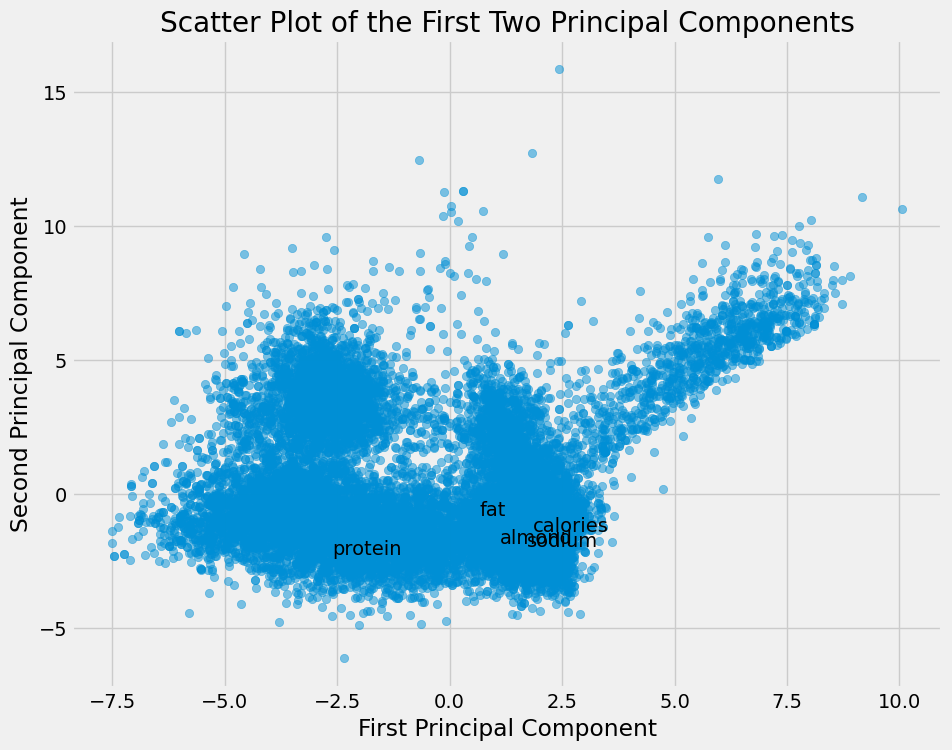

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_recipes = scaler.fit_transform(updated_recipes.select_dtypes(include=['number']))
pca = PCA()
pca.fit(scaled_recipes)
pca_data = pca.transform(scaled_recipes)
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Annotating some points with the variable names
# For clarity, we'll label a few selected variables (e.g., some nutritional and some tag variables)
variable_labels = ['calories', 'protein', 'fat', 'sodium', 'almond', 'anthony.bourdain']
label_indices = [recipes.columns.get_loc(label) for label in variable_labels if label in recipes.columns]

for i in label_indices:
    plt.annotate(recipes.columns[i], (pca_data[i, 0], pca_data[i, 1]))

plt.grid(True)
plt.show()

In [7]:
explain_var = pca.explained_variance_ratio_
cumul_var = np.cumsum(explain_var)
explain_var, cumul_var

(array([1.10066829e-02, 8.91426396e-03, 7.23082319e-03, 5.45246813e-03,
        5.32960953e-03, 4.81684300e-03, 4.39988817e-03, 4.02054839e-03,
        3.82701739e-03, 3.65605796e-03, 3.61213913e-03, 3.48079519e-03,
        3.41610198e-03, 3.38547533e-03, 3.34146539e-03, 3.29307704e-03,
        3.17674363e-03, 3.12991414e-03, 3.09132466e-03, 3.02941529e-03,
        3.01454070e-03, 2.97991370e-03, 2.94173688e-03, 2.89222042e-03,
        2.84936341e-03, 2.80069974e-03, 2.79753405e-03, 2.76736916e-03,
        2.75294316e-03, 2.73248033e-03, 2.70007311e-03, 2.69426581e-03,
        2.67170456e-03, 2.65911559e-03, 2.64392478e-03, 2.60305618e-03,
        2.59373509e-03, 2.57909259e-03, 2.57068249e-03, 2.55593063e-03,
        2.53634965e-03, 2.52914273e-03, 2.49449342e-03, 2.48577250e-03,
        2.47219976e-03, 2.45836688e-03, 2.44826809e-03, 2.42977015e-03,
        2.42858459e-03, 2.42425739e-03, 2.41361733e-03, 2.40656156e-03,
        2.39628852e-03, 2.37957022e-03, 2.36225659e-03, 2.356596

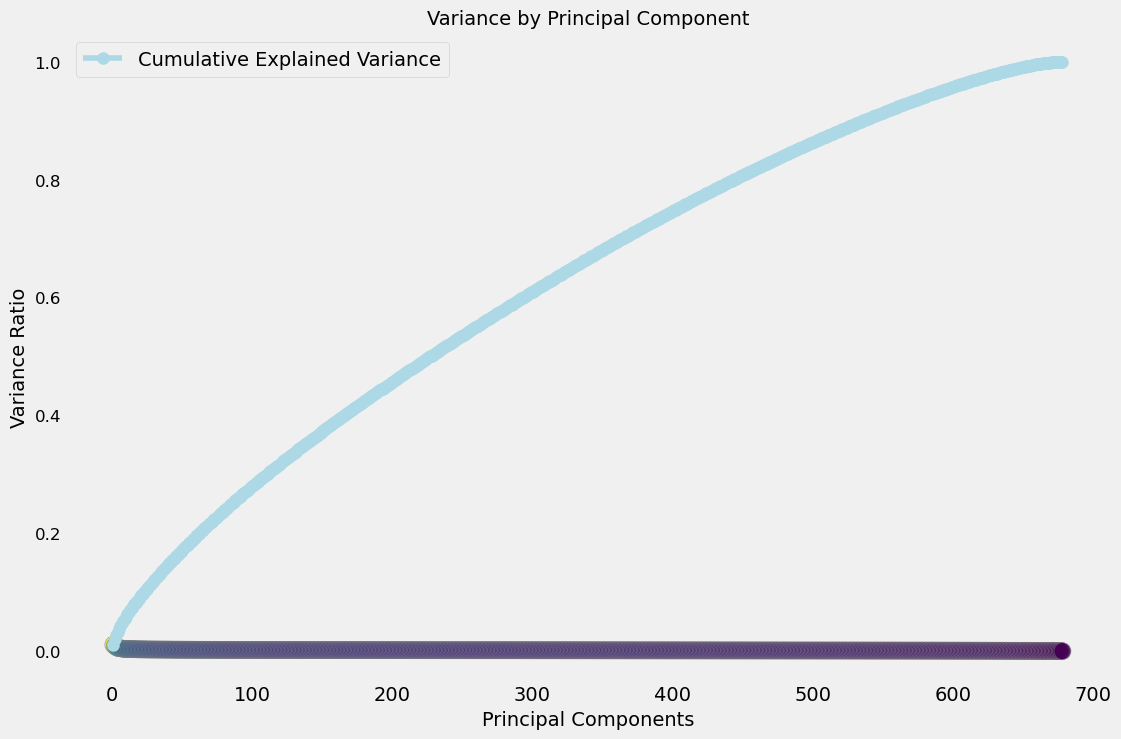

In [41]:
components = np.arange(1, len(explain_var) + 1)

# Plotting
plt.figure(figsize=(12, 8))
# Create a color map
colors = plt.cm.viridis(explain_var / explain_var.max())

scatter = plt.scatter(components, explain_var, c=colors, s=150, edgecolors='grey', alpha=0.75)
plt.plot(components, cumul_var, label='Cumulative Explained Variance', color='lightblue', marker='o', markersize=8)

# Adding more descriptive labels and title
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Variance Ratio', fontsize=14)
plt.title('Variance by Principal Component', fontsize=14)

# Enhancing the grid and ticks for better readability
plt.grid(False)
plt.legend()
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [8]:
## --- END OF Q1 ----

In [9]:
## ---- START OF Q2 ---- 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [10]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, target, test_size=0.3, random_state=42)

/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


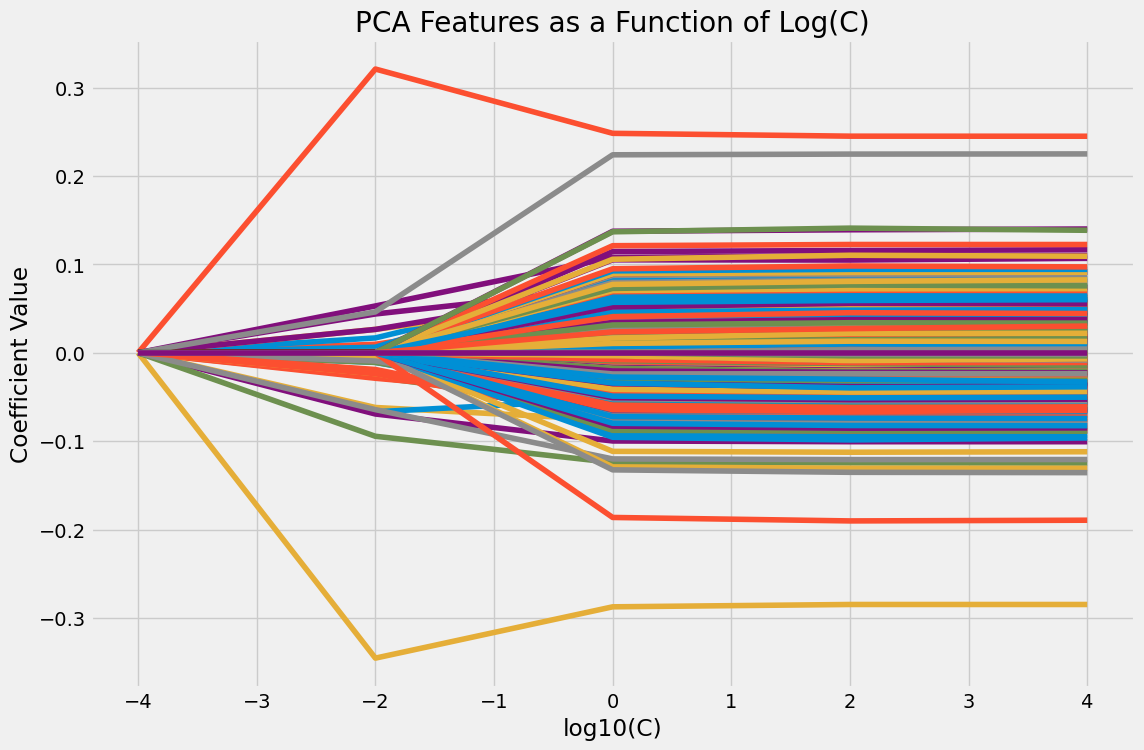

In [26]:
coeffs = []
cs = np.logspace(-4, 4, 5)
for c in cs:
    lr = LogisticRegression(penalty='l1', C=c, solver='saga')
    lr.fit(X_train, y_train)
    coeffs.append(lr.coef_[0])
coeffs = np.array(coeffs)
plt.figure(figsize=(12, 8))
for i in range(coeffs.shape[1]):    
    plt.plot(np.log10(cs), coeffs[:, i], label=f'PC{i + 1}')
plt.title("PCA Features as a Function of Log(C)")
plt.ylabel('Coefficient Value')
plt.xlabel('log10(C)')
plt.show()


In [12]:
# ---- END OF Q2 ----

In [16]:
## ---- START OF Q3 ----
from sklearn.cluster import KMeans 


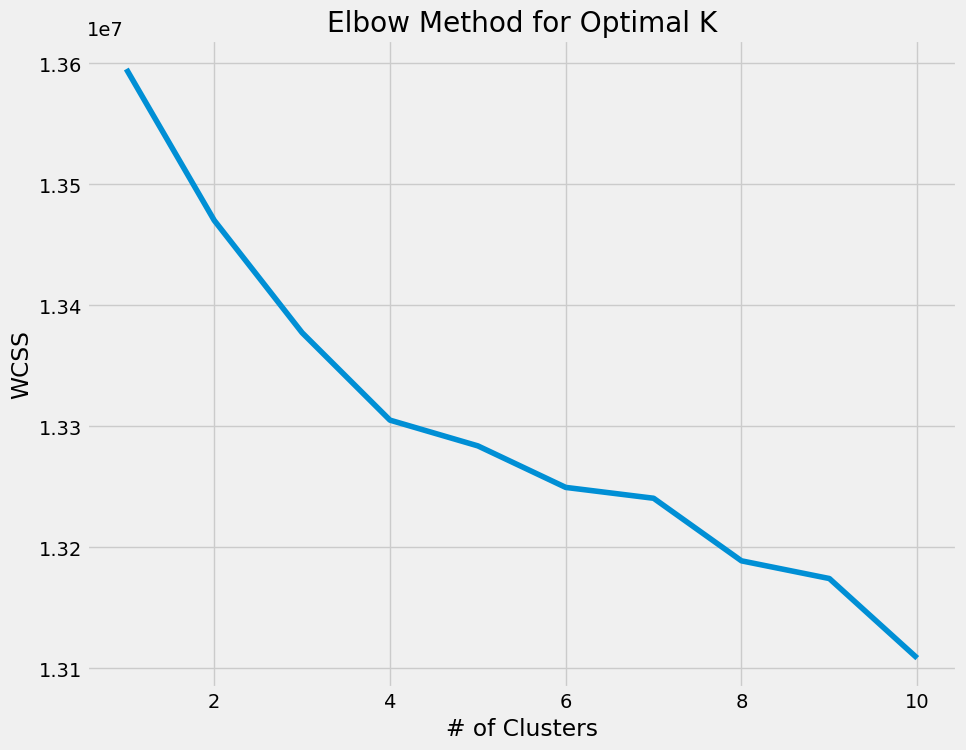

In [17]:
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init="k-means++", max_iter = 300, n_init = 30, random_state = 11)
    kmeans_model.fit(pca_data)
    wcss.append(kmeans_model.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method for Optimal K")
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")
plt.show()


[2 2 2 ... 1 2 2]


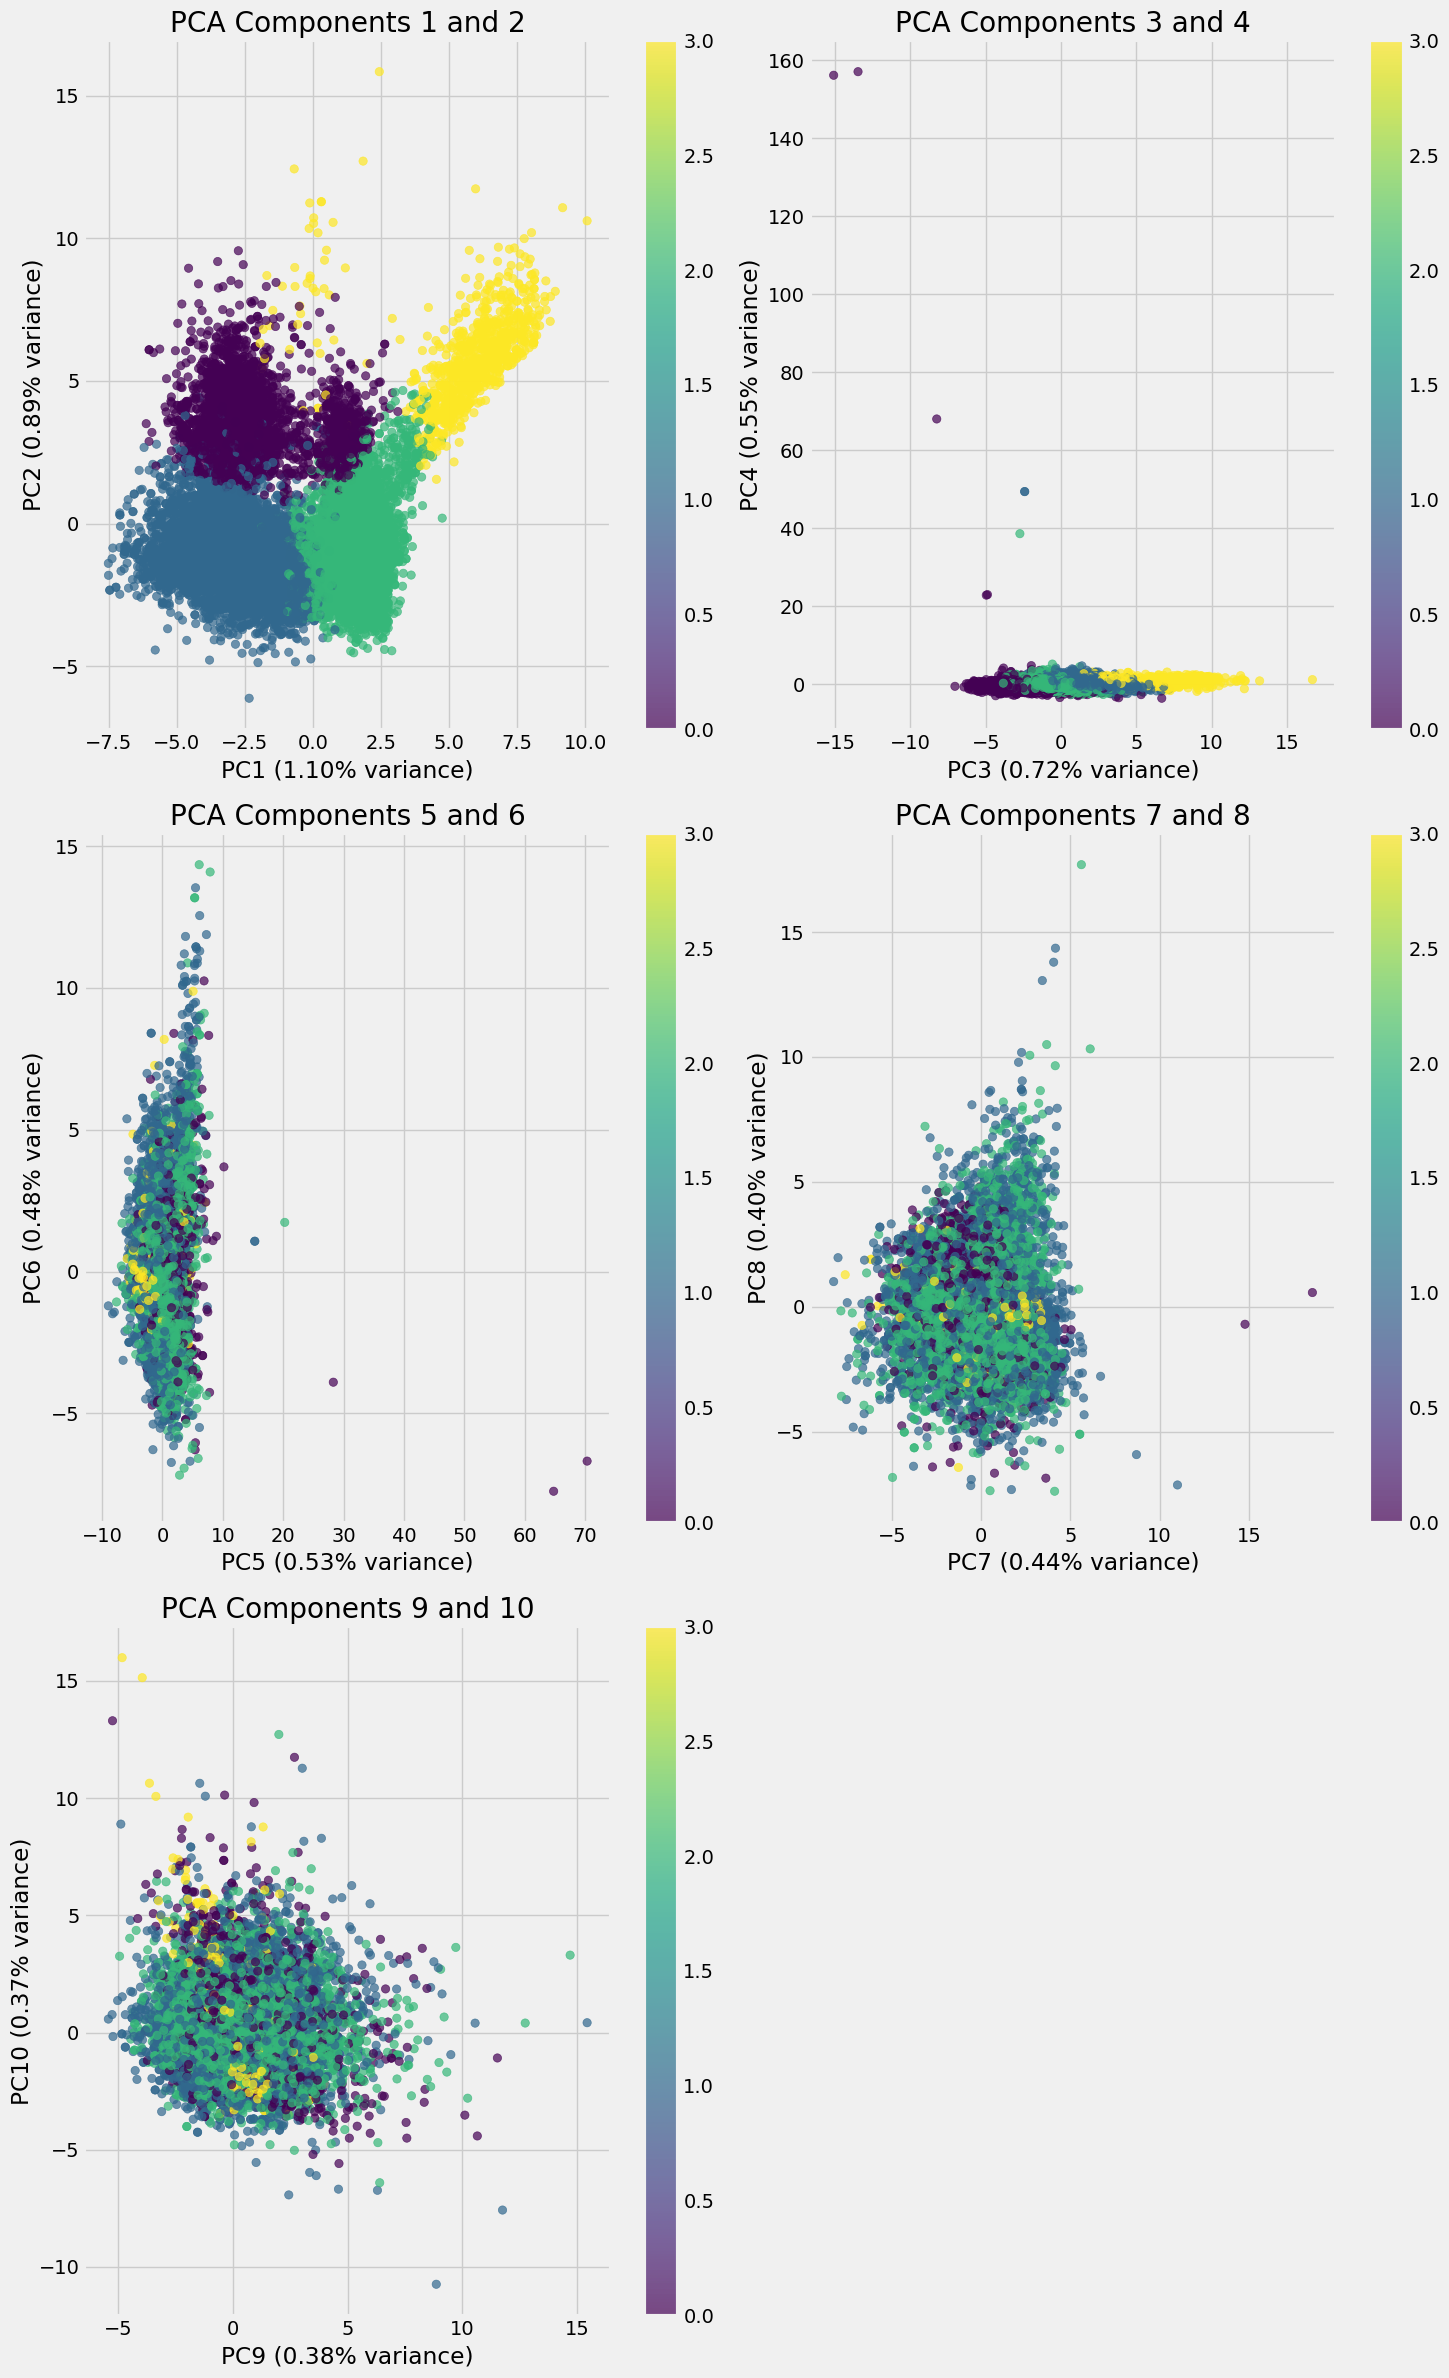

In [48]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=11)
cluster_labels = kmeans.fit_predict(pca_data)
labels = kmeans.labels_
print(labels)
import matplotlib.pyplot as plt

def plot_pca_clusters(components, labels, pcs, nrows, ncols):
    # Calculate the total number of subplots needed
    total_plots = len(pcs)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 8))
    
    # If there's only one subplot, axes may not be an array
    if total_plots == 1:
        axes = [axes]
    
    # Flatten the axes array to simplify processing
    axes = axes.flatten()
    
    # Plot each PCA components pair
    for i, (pc1, pc2) in enumerate(pcs):
        ax = axes[i]
        scatter = ax.scatter(components[:, pc1-1], components[:, pc2-1], c=labels, cmap='viridis', alpha=0.7)
        ax.set_title(f'PCA Components {pc1} and {pc2}')
        ax.set_xlabel(f'PC{pc1} ({pca.explained_variance_ratio_[pc1-1]*100:.2f}% variance)')
        ax.set_ylabel(f'PC{pc2} ({pca.explained_variance_ratio_[pc2-1]*100:.2f}% variance)')
        fig.colorbar(scatter, ax=ax)

    # Remove any extra plots if they exist
    for ax in axes[total_plots:]:
        ax.remove()

    plt.tight_layout()
    plt.show()


# Define the pairs of principal components you want to plot
pcs = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

# Call the function with the desired layout (e.g., 5 rows and 1 column)
plot_pca_clusters(pca_data, cluster_labels, pcs, nrows=3, ncols=2)


In [49]:
recipes['cluster'] = cluster_labels  # Add the cluster labels to your recipesFrame

# Now, let's extract some samples from each cluster
sample_per_cluster = {}
for k in range(optimal_k):  # optimal_k is the number of clusters you determined earlier
    sample_per_cluster[f'Cluster {k + 1}'] = recipes[recipes['cluster'] == k].sample(n=5)  # Change n to however many samples you want

# Optionally, print or examine these samples
for cluster, samples in sample_per_cluster.items():
    print(cluster)
    print(samples)
    print("\n")

Cluster 1
                                           title  rating  calories  protein  \
40                  Coconut-Key Lime Sheet Cake    4.375     483.0      5.0   
13952                    Almond Coconut Granola    4.375     289.0      6.0   
17061           Passover Spongecake with Apples    2.500     199.0      5.0   
17366                   Plum and Mascarpone Pie    3.750     429.0      4.0   
14910  Chocolate Mascarpone Mousse with Bananas    4.375     259.0      2.0   

        fat  sodium  #cakeweek  #wasteless  22-minute meals  \
40     35.0   100.0        0.0         0.0              0.0   
13952  13.0   122.0        0.0         0.0              0.0   
17061   4.0   128.0        0.0         0.0              0.0   
17366  16.0   181.0        0.0         0.0              0.0   
14910  19.0    78.0        0.0         0.0              0.0   

       3-ingredient recipes  ...  yogurt  yonkers  yuca  zucchini  cookbooks  \
40                      0.0  ...     0.0      0.0   0.0 